In [1]:
library(xgboost)

Warning message:
"package 'xgboost' was built under R version 3.6.3"

In [15]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [2]:
loan3000 <- read.csv('./data/loan3000.csv', header = TRUE)

In [32]:
loan3000$outcome <- ordered(loan3000$outcome, levels=c('paid off', 'default'))

In [33]:
head(loan3000)

,X,outcome,purpose_,dti,borrower_score,payment_inc_ratio
,<int>,<ord>,<fct>,<dbl>,<dbl>,<dbl>
1,32109,paid off,debt_consolidation,21.23,0.40,5.11135
2,16982,default,credit_card,15.49,0.40,5.43165
3,25335,paid off,debt_consolidation,27.30,0.70,9.23003
4,34580,paid off,major_purchase,21.11,0.40,2.33482
5,14424,default,debt_consolidation,16.46,0.45,12.10320
6,35621,paid off,debt_consolidation,12.12,0.50,3.89391


In [34]:
predictors <- data.matrix(loan3000[, c('borrower_score', 'payment_inc_ratio')])

In [35]:
head(predictors)

borrower_score,payment_inc_ratio
0.40,5.11135
0.40,5.43165
0.70,9.23003
0.40,2.33482
0.45,12.10320
0.50,3.89391


In [36]:
label <- as.numeric(loan3000[,'outcome'])-1

In [37]:
label

[1] 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0
  [38] 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1
  [75] 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1
 [112] 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 [149] 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0
 [186] 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0
 [223] 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0
 [260] 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0
 [297] 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0
 [334] 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1
 [371] 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1
 [408] 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0
 [445] 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1
 [482] 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 [519] 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0
 [556] 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0
 [593] 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0
 [630] 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0
 [667] 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1
 [704] 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1
 [741] 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1
 [778] 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1
 [815] 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1
 [852] 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 [889] 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0
 [926] 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0
 [963] 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1
[1000] 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0
[1037] 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0
[1074] 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0
[1111] 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0
[1148] 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1
[1185] 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0
[1222] 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
[1259] 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1
[1296] 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1
[1333] 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0
[1370] 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
[1407] 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1
[1444] 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0
[1481] 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0
[1518] 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1
[1555] 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0
[1592] 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0
[1629] 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0
[1666] 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1
[1703] 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1
[1740] 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0
[1777] 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0
[1814] 1 0 0 1 1 1 0 0 1 0 1 1 1 1

In [38]:
xgb <- xgboost(data = predictors, label=label,
              objective = 'binary:logistic',
              params=list(subsample=.63, eta=0.1), nrounds=100)

[1]	train-error:0.374333 
[2]	train-error:0.351333 
[3]	train-error:0.348000 
[4]	train-error:0.336667 
[5]	train-error:0.337000 
[6]	train-error:0.330000 
[7]	train-error:0.327000 
[8]	train-error:0.324667 
[9]	train-error:0.326333 
[10]	train-error:0.326000 
[11]	train-error:0.326000 
[12]	train-error:0.327667 
[13]	train-error:0.324667 
[14]	train-error:0.322667 
[15]	train-error:0.320333 
[16]	train-error:0.321000 
[17]	train-error:0.319667 
[18]	train-error:0.314667 
[19]	train-error:0.311667 
[20]	train-error:0.311667 
[21]	train-error:0.308000 
[22]	train-error:0.306667 
[23]	train-error:0.307000 
[24]	train-error:0.310667 
[25]	train-error:0.305667 
[26]	train-error:0.305333 
[27]	train-error:0.303667 
[28]	train-error:0.304667 
[29]	train-error:0.306000 
[30]	train-error:0.304000 
[31]	train-error:0.305000 
[32]	train-error:0.303000 
[33]	train-error:0.302000 
[34]	train-error:0.299667 
[35]	train-error:0.300000 
[36]	train-error:0.298667 
[37]	train-error:0.294667 
[38]	train

In [39]:
pred <- predict(xgb, newdata=predictors)

In [40]:
xgb_df <- cbind(loan3000, pred_default=pred>.5, prob_default=pred)

In [41]:
head(xgb_df)

,X,outcome,purpose_,dti,borrower_score,payment_inc_ratio,pred_default,prob_default
,<int>,<ord>,<fct>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,32109,paid off,debt_consolidation,21.23,0.40,5.11135,FALSE,0.3795462
2,16982,default,credit_card,15.49,0.40,5.43165,TRUE,0.6589023
3,25335,paid off,debt_consolidation,27.30,0.70,9.23003,FALSE,0.3557730
4,34580,paid off,major_purchase,21.11,0.40,2.33482,FALSE,0.2957606
5,14424,default,debt_consolidation,16.46,0.45,12.10320,TRUE,0.7498461
6,35621,paid off,debt_consolidation,12.12,0.50,3.89391,FALSE,0.3086281


Warning message:
"Ignoring unknown parameters: siz"

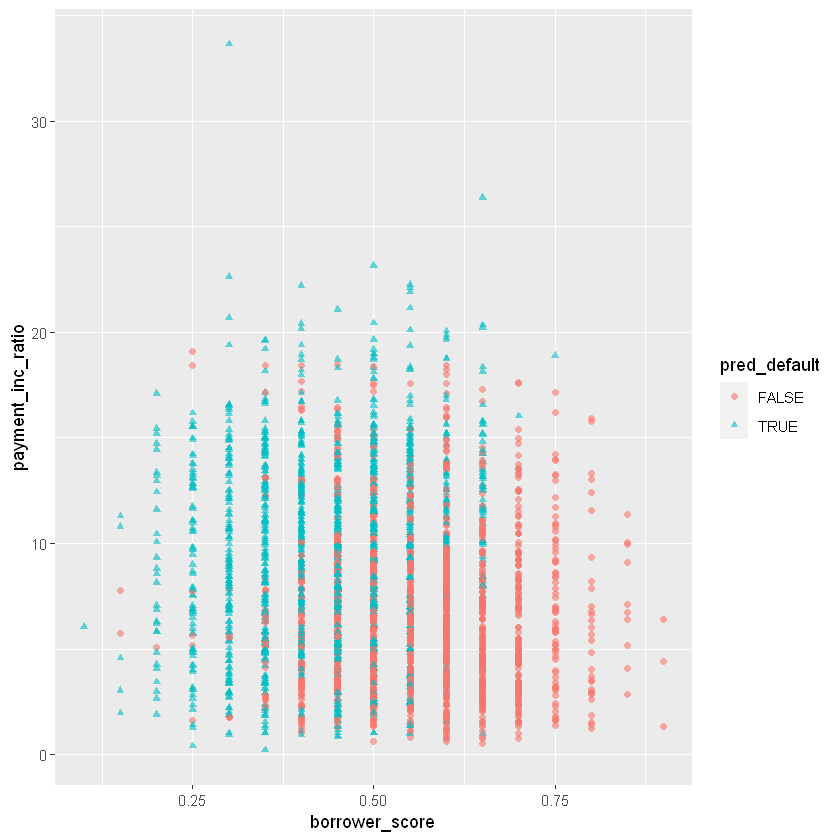

In [42]:
ggplot(data = xgb_df, aes(x=borrower_score, y=payment_inc_ratio,
                         color=pred_default, shape=pred_default))+
geom_point(alpha=.6, siz=2)

In [19]:
loan_data <- read.csv('./data/loan_data.csv', header = TRUE)

In [23]:
head(loan_data)

,X,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>,...,<int>,<int>,<int>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>
1,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
2,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
3,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
4,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
5,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55
6,6,Charged Off,21000,36 months,105000,13.22,8.01977,32135,90.3,debt_consolidation,...,1,1,7,5.8,default,11,debt_consolidation,RENT,> 1 Year,0.40


In [20]:
predictors <- data.matrix(loan_data[,-which(names(loan_data) %in% 'outcome')])

In [22]:
head(predictors )

X,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,emp_length,purpose_,home_,emp_len_,borrower_score
1,1,2500,2,30000,1.00,2.39320,1687,9.4,1,4,1,1,3,4.8,1,4,3,2,0.65
2,1,5600,2,40000,5.55,4.57170,5210,32.6,10,3,1,1,11,1.4,5,7,2,2,0.80
3,1,5375,2,15000,18.08,9.71600,9279,36.5,9,4,1,1,2,6.0,1,6,3,2,0.60
4,1,9000,1,30000,10.08,12.21520,10452,91.7,3,4,1,1,4,4.2,1,2,3,2,0.50
5,1,10000,1,100000,7.06,3.90888,11997,55.5,9,4,1,1,14,5.4,4,6,3,2,0.55
6,1,21000,1,105000,13.22,8.01977,32135,90.3,3,4,1,1,7,5.8,11,2,3,2,0.40


In [29]:
library(dplyr)
library(xgboost)

In [48]:
loan_data <- read.csv('./data/loan_data.csv')
loan_data <- select(loan_data, -X, -status)

In [49]:
seed <- 400820
predictors <- data.matrix(loan_data[,-which(names(loan_data) %in% 'outcome')])
label <- as.numeric(loan_data$outcome)-1
test_idx <- sample(nrow(loan_data), 10000)

xgb_default <- xgboost(data=predictors[-test_idx,], label=label[-test_idx], 
                       objective = "binary:logistic", nrounds=250, verbose=0)
pred_default <- predict(xgb_default, predictors[test_idx,])
error_default <- abs(label[test_idx] - pred_default) > 0.5
xgb_default$evaluation_log[250,]
mean(error_default)


iter,train_error
<dbl>,<dbl>
250,0.127695


[1] 0.3528

In [50]:
xgb_penalty <- xgboost(data=predictors[-test_idx,], 
                       label=label[-test_idx], 
                       params=list(eta=.1, subsample=.63, lambda=1000),
                       objective = "binary:logistic", nrounds=250, verbose=0)
pred_penalty <- predict(xgb_penalty, predictors[test_idx,])
error_penalty <- abs(label[test_idx] - pred_penalty) > 0.5
xgb_penalty$evaluation_log[250,]
mean(error_penalty)

iter,train_error
<dbl>,<dbl>
250,0.31181


[1] 0.3316

In [52]:
error_default <- rep(0, 250)
error_penalty <- rep(0, 250)
for(i in 1:250)
{
  pred_default <- predict(xgb_default, predictors[test_idx,], ntreelimit = i)
  error_default[i] <- mean(abs(label[test_idx] - pred_default) > 0.5)
  pred_penalty <- predict(xgb_penalty, predictors[test_idx,], ntreelimit = i)
  error_penalty[i] <- mean(abs(label[test_idx] - pred_penalty) > 0.5)
}

errors <- rbind(xgb_default$evaluation_log,
                xgb_penalty$evaluation_log,
                data.frame(iter=1:250, train_error=error_default),
                data.frame(iter=1:250, train_error=error_penalty))
errors$type <- rep(c('default train', 'penalty train', 
                     'default test', 'penalty test'), rep(250, 4))

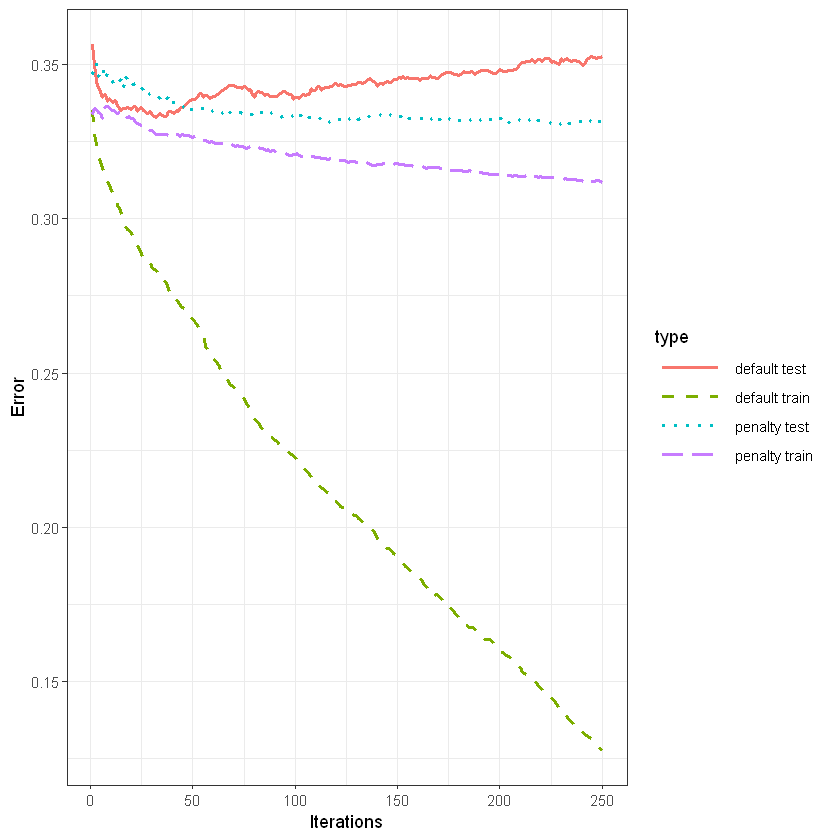

In [53]:
ggplot(errors, aes(x=iter, y=train_error, group=type)) +
  geom_line(aes(linetype=type, color=type), size=1) +
  scale_linetype_manual(values=c('solid', 'dashed', 'dotted', 'longdash')) +
  theme_bw() +
  theme(legend.key.width = unit(1.5,"cm")) +
  labs(x="Iterations", y="Error") +
  guides(colour = guide_legend(override.aes = list(size=1)))

In [54]:
N <- nrow(loan_data)
fold_number <- sample(1:5, N, replace = TRUE)
params <- data.frame(eta = rep(c(.1, .5, .9), 3),
                     max_depth = rep(c(3, 6, 12), rep(3,3)))
rf_list <- vector('list', 9)
error <- matrix(0, nrow=9, ncol=5)
for(i in 1:nrow(params)){
  for(k in 1:5){
    cat('Fold', k, 'for model', i, '\n')
    fold_idx <- (1:N)[fold_number == k]
    xgb <- xgboost(data=predictors[-fold_idx,], label=label[-fold_idx], 
                   params = list(eta = params[i, 'eta'], 
                                 max_depth = params[i, 'max_depth']),
                   objective = "binary:logistic", nrounds=100, verbose=0)
    pred <- predict(xgb, predictors[fold_idx,])
    error[i, k] <- mean(abs(label[fold_idx] - pred) >= 0.5)
  }
}

avg_error <- 100 * round(rowMeans(error), 4)
cbind(params, avg_error)

Fold 1 for model 1 
Fold 2 for model 1 
Fold 3 for model 1 
Fold 4 for model 1 
Fold 5 for model 1 
Fold 1 for model 2 
Fold 2 for model 2 
Fold 3 for model 2 
Fold 4 for model 2 
Fold 5 for model 2 
Fold 1 for model 3 
Fold 2 for model 3 
Fold 3 for model 3 
Fold 4 for model 3 
Fold 5 for model 3 
Fold 1 for model 4 
Fold 2 for model 4 
Fold 3 for model 4 
Fold 4 for model 4 
Fold 5 for model 4 
Fold 1 for model 5 
Fold 2 for model 5 
Fold 3 for model 5 
Fold 4 for model 5 
Fold 5 for model 5 
Fold 1 for model 6 
Fold 2 for model 6 
Fold 3 for model 6 
Fold 4 for model 6 
Fold 5 for model 6 
Fold 1 for model 7 
Fold 2 for model 7 
Fold 3 for model 7 
Fold 4 for model 7 
Fold 5 for model 7 
Fold 1 for model 8 
Fold 2 for model 8 
Fold 3 for model 8 
Fold 4 for model 8 
Fold 5 for model 8 
Fold 1 for model 9 
Fold 2 for model 9 
Fold 3 for model 9 
Fold 4 for model 9 
Fold 5 for model 9 


eta,max_depth,avg_error
<dbl>,<dbl>,<dbl>
0.1,3,33.17
0.5,3,33.55
0.9,3,34.42
0.1,6,33.24
0.5,6,35.51
0.9,6,37.59
0.1,12,34.51
0.5,12,37.06
0.9,12,38.22


In [ ]:
#bdp.kt.co.kr